Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2021/2022  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2021 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **24. listopada 2021. u 23:59h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od četiri zadatka, te tri dodatna zadatka koji se **ne boduju**. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [85]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f', 'norm', 'poly']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


### 1. Jednostavna regresija


Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [86]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
y = y.reshape((-1, 1))

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [87]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(1)
th = poly.fit_transform(X)

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [88]:
from numpy import linalg
th_transpose = np.transpose(th)
w = linalg.inv(th_transpose @ th) @ th_transpose @ y
print(w)  # y = 2.2 + 0.4571x
th_psuudoinverz = linalg.pinv(th) # linalg.inv(th_transpose @ th) @ th_transpose
w1 = th_psuudoinverz @ y

[[2.2       ]
 [0.45714286]]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

array([[2.2       ],
       [2.65714286],
       [3.11428571],
       [4.02857143]])

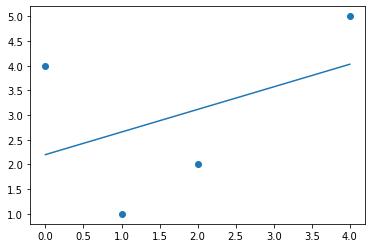

In [89]:
from sklearn.metrics import mean_squared_error

h = th @ w
plt.scatter(X,y)
plt.plot(X,h)
mean_squared_error(y,h)
h
# E(h|D) počinje s 1/2, dok MSE počinje s 1/N, realnija MSE, ali u regersiji koristimo E(h|D) radi kasnije matematičke jednostavnosti

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [21]:
th_inv = linalg.inv(th) #  LinAlgError: Last 2 dimensions of the array must be square
# th matrica nije kvadratna, sustav jednadžbi je preodređen

LinAlgError: Last 2 dimensions of the array must be square

In [22]:
#Taj problem bi mogli rješiti preslikavanjem u n = 3 (jednostavna pol regresija 3. stupnja), matrica dim(th) = (4,4) te ima inverz ako je punog ranga
poly3 = PolynomialFeatures(3)
th3 = poly3.fit_transform(X)
w3 = linalg.inv(th3) @ y
w3 # 4 + -5.91x + 3.375x^2 - 0.458x^3

array([[ 4.        ],
       [-5.91666667],
       [ 3.375     ],
       [-0.45833333]])

### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [23]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X,y)
print("coenf: " + str(reg.coef_) + ", inercept: " + str(reg.intercept_))
mean_squared_error(y,reg.predict(X))


coenf: [[0.45714286]], inercept: [2.2]


2.042857142857143

### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [24]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    noise_array = normal(0,noise,len(X))
    return np.array([np.array([f(x) + y]) for x, y in zip(X,noise_array)]) 

#test
make_labels(np.array([[1],[2],[3],[4],[5]]),lambda X : 5 + X[0] - 2 * X[0] ** 2 - 5 * X[0] ** 3, 200)

array([[  61.99917517],
       [-332.03049469],
       [-104.92742982],
       [-119.02714517],
       [-653.39378838]])

In [26]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [108]:
X1 = make_instances(-5,5,50)

f = lambda X : 5 + X[0] - 2 * X[0] ** 2 - 5 * X[0] ** 3
y1 = make_labels(X1,f,200)
y1 = y1.reshape((-1, 1))
# reashape kako bi pretvorili vektor u matricu jer (50,) nije isto kao i (50,1); -1 znači uzmi koliko treba redaka, po 1 element

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

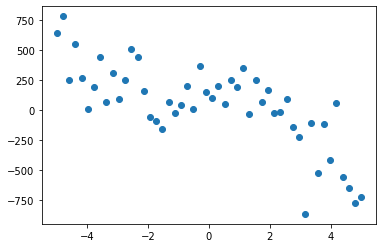

In [28]:
plt.scatter(X1[:,0],y1)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

33243.013157769565

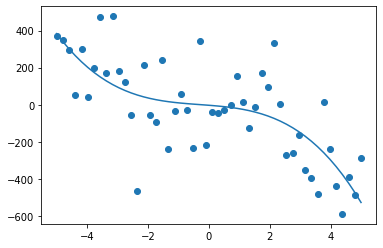

In [109]:
poly3 = PolynomialFeatures(3)
th3 = poly3.fit_transform(X1)
th3_psuudoinverz = linalg.pinv(th3) # linalg.inv(th_transpose @ th) @ th_transpose
w3 = th3_psuudoinverz @ y1

plt.scatter(X1[:,0],y1)
plt.plot(X1,th3 @ w3)
mean_squared_error(y1,th3 @ w3)

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

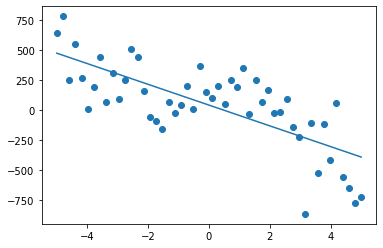

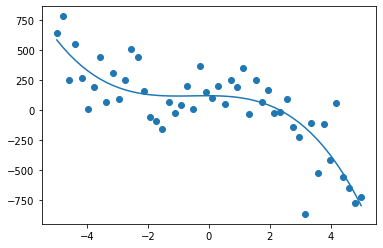

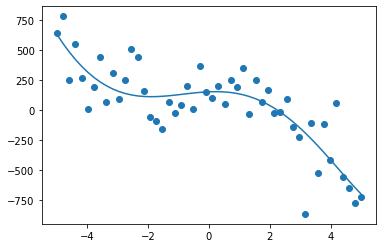

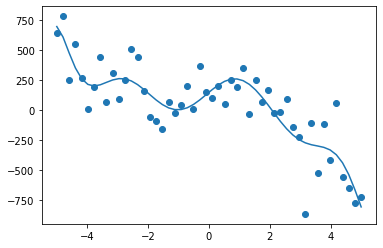

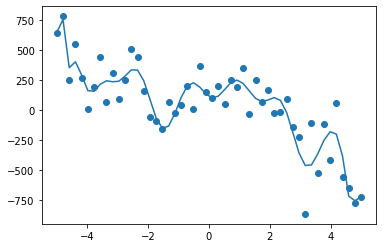

In [30]:
for i,d in enumerate([1,3,5,10,20]):
    poly = PolynomialFeatures(d)
    th = poly.fit_transform(X1)
    th_psuudoinverz = linalg.pinv(th) # linalg.inv(th_transpose @ th) @ th_transpose
    w = th_psuudoinverz @ y1
    plt.figure(i)
    plt.scatter(X1[:,0],y1)
    plt.plot(X1,th @ w)


### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

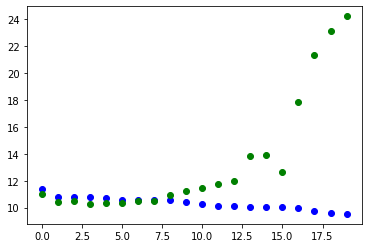

In [189]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.5)

def unakrsnaProvjera(X_train, X_test, y_train, y_test,plot):
    for i,d in enumerate(range(0,20)):
        poly = PolynomialFeatures(d)
        th = poly.fit_transform(X_train)
        th_psuudoinverz = linalg.pinv(th) # linalg.inv(th_transpose @ th) @ th_transpose
        w = th_psuudoinverz @ y_train
        h = th @ w
        err_train = math.log(mean_squared_error(y_train,h))
        plot.scatter([d],[err_train], c ='blue')
        th_test = th = poly.fit_transform(X_test)
        h_test = th_test @ w
        err_test = math.log(mean_squared_error(y_test,h_test))
        plot.scatter([d],[err_test], c ='green')
    
unakrsnaProvjera(X_train, X_test, y_train, y_test,plt)


### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

(500, 1) (500, 1)


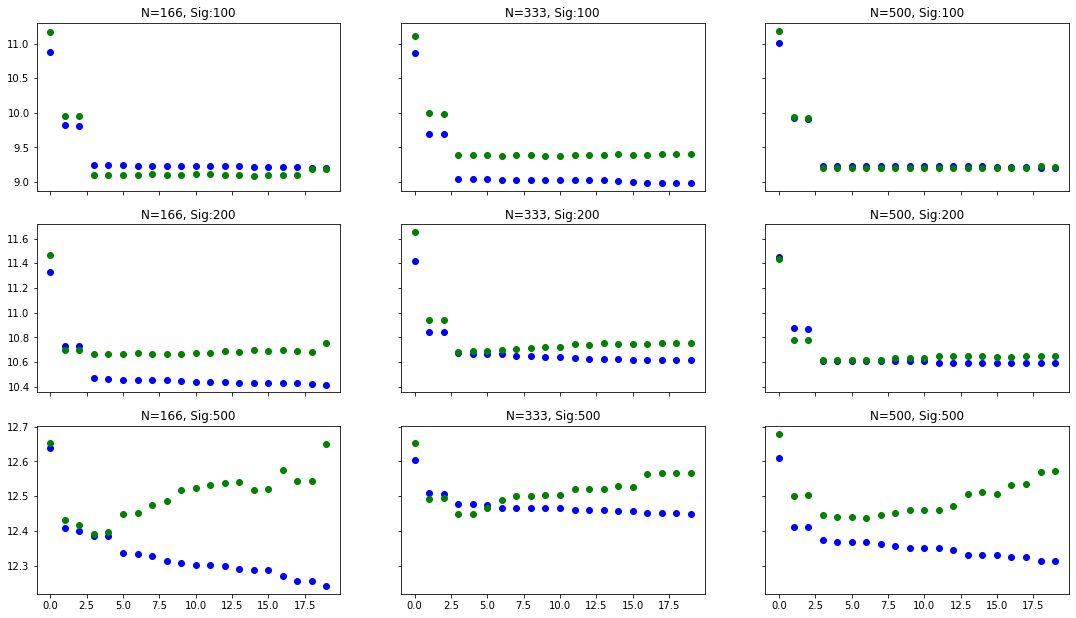

In [190]:
N = 1000
sig = [100,200,500]
parts = [3,1.5,1]
X2 = make_instances(-5,5,N)
X2_train, X2_test = train_test_split(X2, test_size=0.5)
print(X2_train.shape, X2_test.shape)
f = lambda X : 5 + X[0] - 2 * X[0] ** 2 - 5 * X[0] ** 3
fig, ax = plt.subplots(3, 3, sharex='col', sharey='row')
fig.set_size_inches(18.5, 10.5, forward=True)
for i,x in enumerate(sig):
    for j,y in enumerate(parts):
        x_train = X2_train[:int(len(X2_train) // y)]
        y_train = make_labels(X2_train,f,x)[:int(len(X2_train) // y)]
        x_test = X2_test[:int(len(X2_train) // y)]
        y_test = make_labels(X2_test,f,x)[:int(len(X2_train) // y)]
        ax[i][j].set_title("N=" + str(int(len(X2_train) // y)) + ", Sig:" + str(x))
        unakrsnaProvjera(x_train, x_test, y_train, y_test,ax[i][j])


***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

[[ 4.        ]
 [-5.91666667]
 [ 3.375     ]
 [-0.45833333]]
[[ 3.05696145]
 [-0.69079365]
 [-0.2831746 ]
 [ 0.1445805 ]]
[[ 2.49444184]
 [-0.15897295]
 [-0.13423067]
 [ 0.0815601 ]]


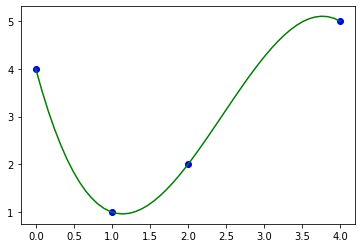

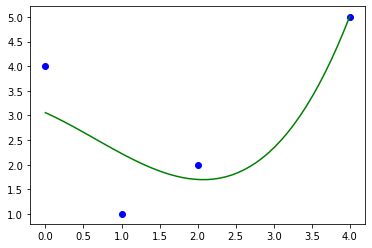

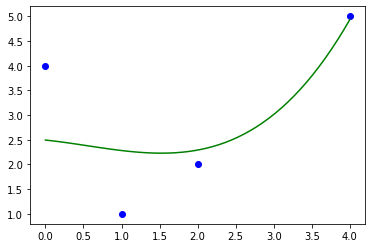

In [43]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
y = y.reshape((-1, 1))
poly3 = PolynomialFeatures(3)
th3 = poly3.fit_transform(X)
th3_transpose = np.transpose(th3)
lambdas = [0,1,10]
f = lambda x,w : w[0][0] + x * w[1][0] +  w[2][0] * (x**2) + w[3][0] * (x**3)
Xs = make_instances(0,4,50)
for i,l in enumerate(lambdas):
    I =  np.identity(th3.shape[0])
    I[0][0] = 0
    th3_psuudoinverz = linalg.inv(th3_transpose @ th3 + l * I)   @ th3_transpose
    w3 = th3_psuudoinverz @ y
    print(w3)
    plt.figure(i)
    plt.scatter(X,y, color = 'blue')
    plt.plot(Xs,[f(x,w3) for x in Xs], color = 'green')


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [42]:
from sklearn.linear_model import Ridge
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
y = y.reshape((-1, 1))
poly3 = PolynomialFeatures(3)
th3 = poly3.fit_transform(X)
lambdas = [0,1,10]
print(th3)
for i,l in enumerate(lambdas):
    ridge = Ridge(alpha=l) # I matrica u izrazu lambda * I na [0][0] ima 0
    ridge.fit(th3,y)
    print(ridge.coef_,ridge.intercept_)
    # plt.figure(i)
    # plt.scatter(X,y, color = 'blue')
    # plt.plot(Xs,[f(x,w3) for x in Xs], color = 'green')

[[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  4. 16. 64.]]
[[ 0.         -5.91666667  3.375      -0.45833333]] [4.]
[[ 0.         -0.69079365 -0.2831746   0.1445805 ]] [3.05696145]
[[ 0.         -0.15897295 -0.13423067  0.0815601 ]] [2.49444184]


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

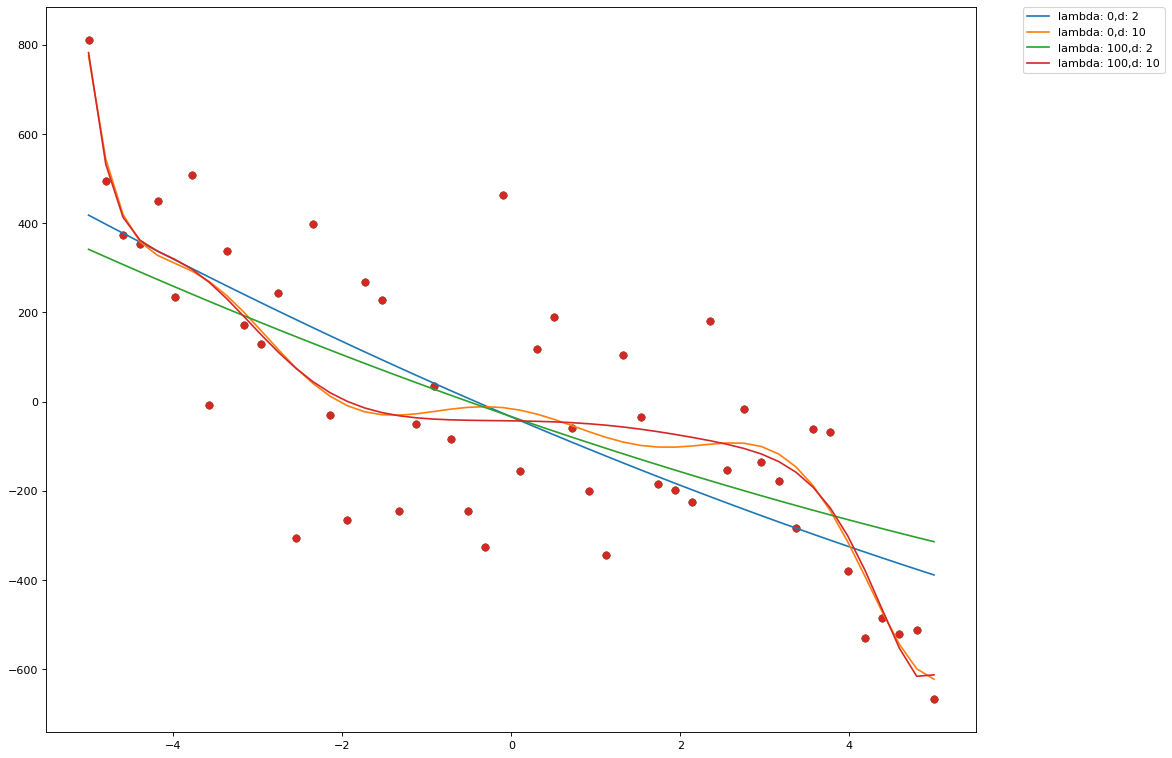

In [55]:
from matplotlib.pyplot import figure

figure(figsize=(15, 12), dpi=80)
X1 = make_instances(-5,5,50)
f = lambda X : 5 + X[0] - 2 * X[0] ** 2 - 5 * X[0] ** 3
y1 = make_labels(X1,f,200)
lambdas = [0,100]
ds = [2,10]
for l in lambdas:
    for d in ds:
        poly = PolynomialFeatures(d)
        th = poly.fit_transform(X1)
        ridge = Ridge(alpha=l)
        ridge.fit(th,y1)
        y_train = ridge.predict(th)
        plt.scatter(X1,y1)
        plt.plot(X1,y_train,label="lambda: " + str(l) + ",d: " + str(d))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)




### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


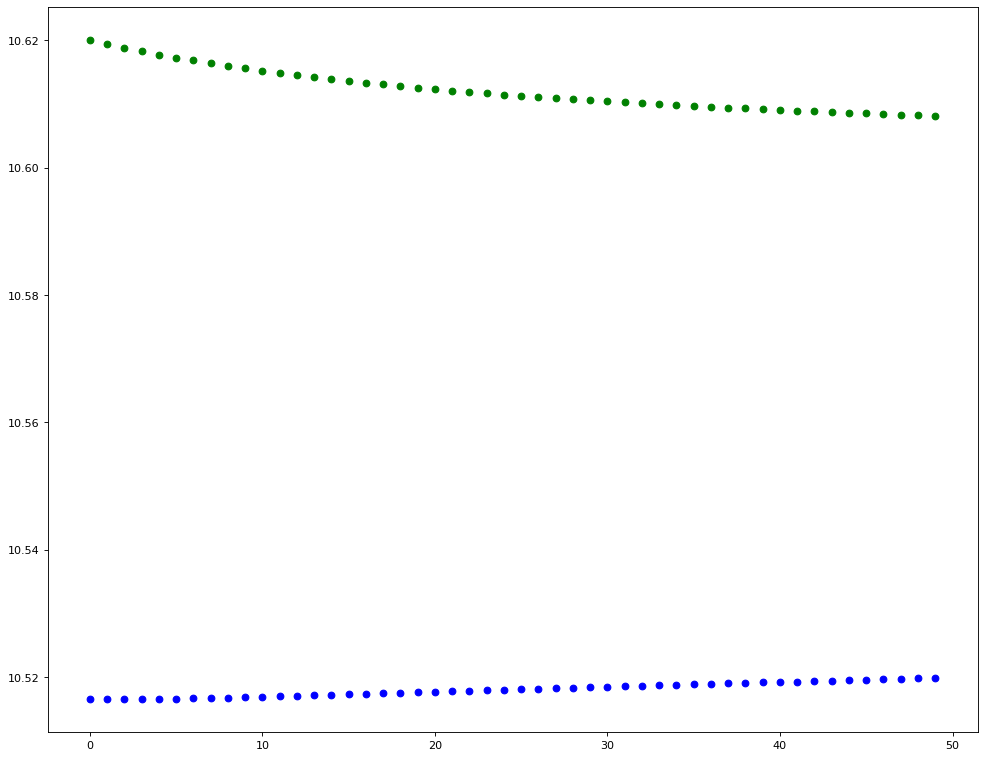

In [264]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib.pyplot import figure

figure(figsize=(15, 12), dpi=80)
N = 1000
X = make_instances(-5,5,N)
f = lambda X : 5 + X[0] - 2 * X[0] ** 2 - 5 * X[0] ** 3
y = make_labels(X,f,200)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
d = 10
poly = PolynomialFeatures(d)
th_train = poly.fit_transform(X_train)
th_test = poly.fit_transform(X_test)
lambdas = range(0,50)
for l in lambdas:
    ridge = Ridge(alpha=l)
    ridge.fit(th_train,y_train)
    h_train = ridge.predict(th_train)
    h_test = ridge.predict(th_test)
    train_err = math.log(mean_squared_error(y_train,h_train))
    test_err = math.log(mean_squared_error(y_test,h_test))
    plt.scatter(l,train_err, color = 'blue' , label = 'Train')
    plt.scatter(l,test_err, color = 'green' , label = 'Test')

#
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)





## Dodatni zadatci

Zadatci u nastavku (označeni zvjezdicom) nisu dio obaveznog dijela laboratorijske vježbe, niti nose bonus bodove. Dakle, nije ih potrebno riješiti kako biste ostvarili 100% bodova na ovoj laboratorijskoj vježbi. Međutim, preporučamo vam da ih pokušate riješiti i na terminu predaje prodiskutirate svoja rješenja s asistentima.

### *5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [137]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

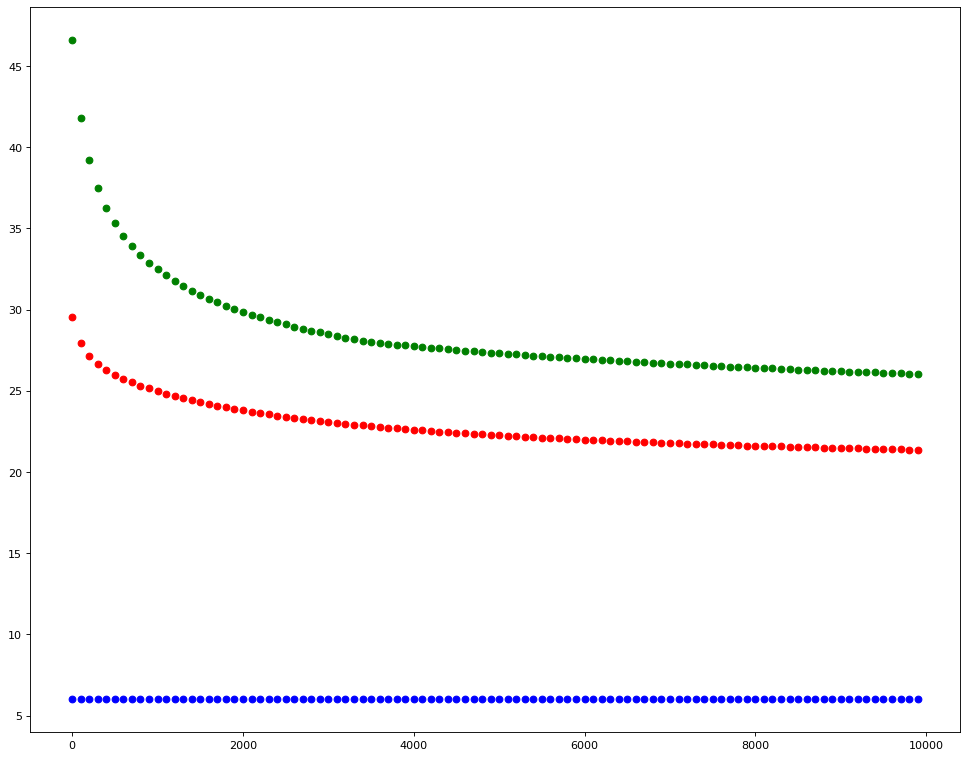

In [138]:
from sklearn.linear_model import Ridge
from matplotlib.pyplot import figure

figure(figsize=(15, 12), dpi=80)

def norm(w, L):
    if(L == 0): return nonzeroes(w)
    if(L == 1): return np.sum(np.abs(w))
    if(L == 2): return math.sqrt(w.T @ w)
    return None

N = 1000
X = make_instances(-5,5,N)
f = lambda X : 5 + X[0] - 2 * X[0] ** 2 - 5 * X[0] ** 3
y = make_labels(X,f,200)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
d = 5
poly = PolynomialFeatures(d)
th_train = poly.fit_transform(X_train)
th_test = poly.fit_transform(X_test)
lambdas = range(0,10000,100)
for l in lambdas:
    ridge = Ridge(alpha=l)
    ridge.fit(th_train,y_train)
    ridge.coef_[0][0] = ridge.intercept_
    w = ridge.coef_.T
    plt.scatter(l,norm(w,0), color ='blue')
    plt.scatter(l,norm(w,1), color = 'green' )
    plt.scatter(l,norm(w,2),color = 'red')





### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

<ipython-input-150-28d116e56a0f>:25: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(th_train,y_train)
C:\Users\Filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Filip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10117015.434888663, tolerance: 4827.53095679193
  model = cd_fast.enet_coordinate_descent(


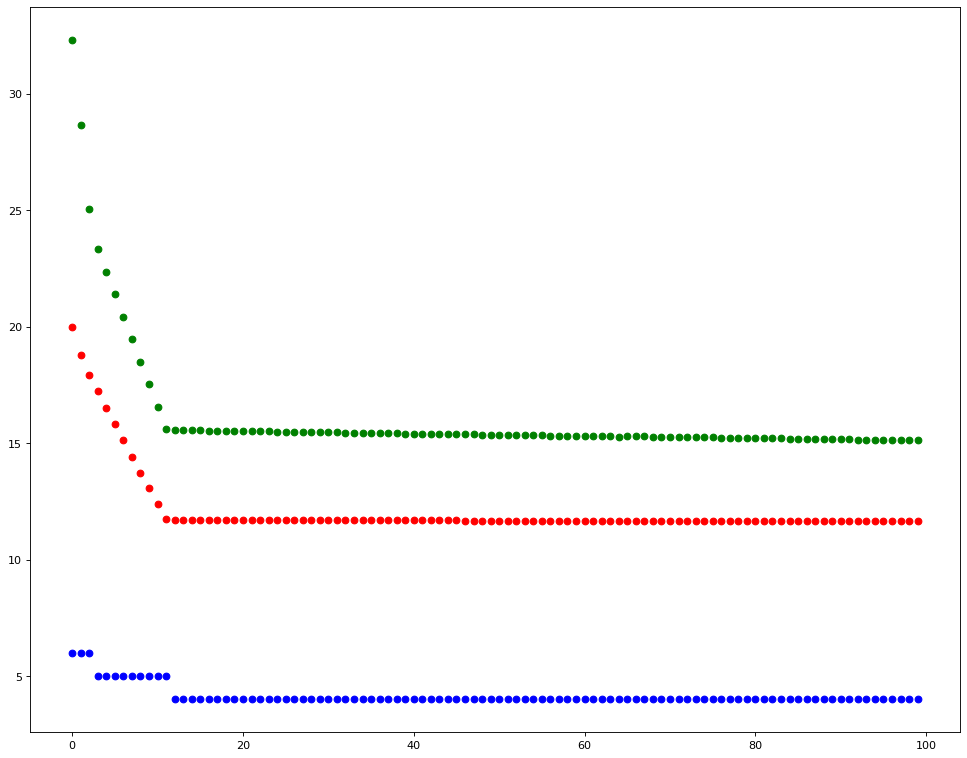

In [150]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from matplotlib.pyplot import figure

figure(figsize=(15, 12), dpi=80)

def norm(w, L):
    if(L == 0): return nonzeroes(w)
    if(L == 1): return np.sum(np.abs(w))
    if(L == 2): return math.sqrt(w.T @ w)
    return None

N = 1000
X = make_instances(-5,5,N)
f = lambda X : 5 + X[0] - 2 * X[0] ** 2 - 5 * X[0] ** 3
y = make_labels(X,f,200)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
d = 5
poly = PolynomialFeatures(d)
th_train = poly.fit_transform(X_train)
th_test = poly.fit_transform(X_test)
lambdas = range(0,100)
for l in lambdas:
    lasso = Lasso(alpha=l)
    lasso.fit(th_train,y_train)
    lasso.coef_[0] = lasso.intercept_
    w = np.array([lasso.coef_]).T
    plt.scatter(l,norm(w,0), color ='blue')
    plt.scatter(l,norm(w,1), color = 'green' )
    plt.scatter(l,norm(w,2),color = 'red')


### *6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [152]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

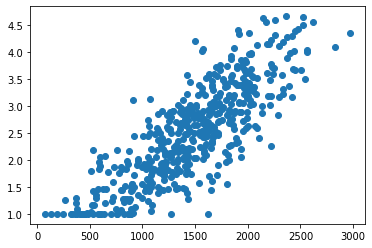

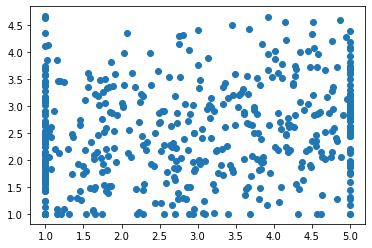

In [176]:
plt.figure(0)
plt.scatter(grades_X[:,0],grades_y)
plt.figure(1)
plt.scatter(grades_X[:,1],grades_y)

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

array([0.        , 0.00141497, 0.09477276])

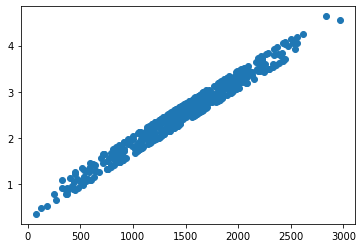

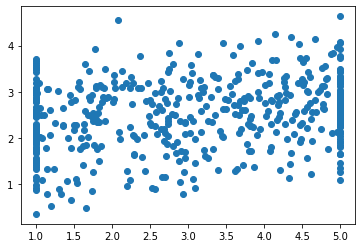

In [187]:
l = 0.01
poly = PolynomialFeatures(1)
th = poly.fit_transform(grades_X)
ridge = Ridge(alpha=l)
ridge.fit(th,grades_y)
h = ridge.predict(th)
plt.figure(0)
plt.scatter(grades_X[:,0],h)
plt.figure(1)
plt.scatter(grades_X[:,1],h)
ridge.coef_

Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

array([0.        , 0.73954683, 0.13741539])

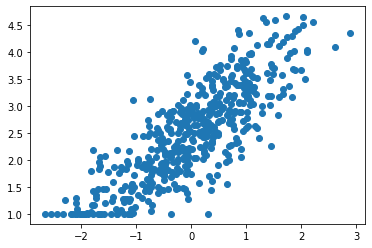

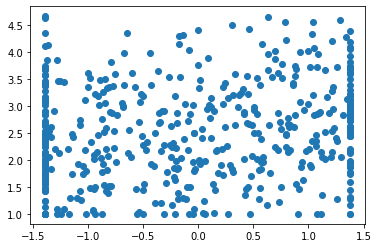

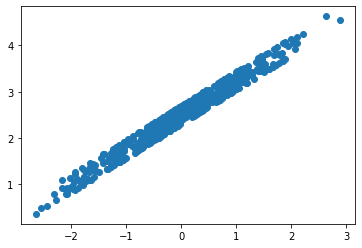

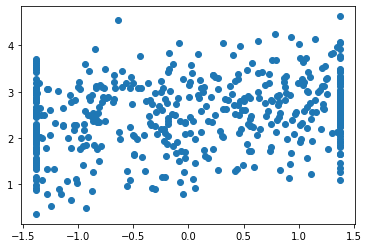

In [188]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(grades_X)
scalar_X = scaler.transform(grades_X)
plt.figure(0)
plt.scatter(scalar_X[:,0],grades_y)
plt.figure(1)
plt.scatter(scalar_X[:,1],grades_y)

l = 0.01
poly = PolynomialFeatures(1)
th = poly.fit_transform(scalar_X)
ridge = Ridge(alpha=l)
ridge.fit(th,grades_y)
h = ridge.predict(th)
plt.figure(2)
plt.scatter(scalar_X[:,0],h)
plt.figure(3)
plt.scatter(scalar_X[:,1],h)
ridge.coef_

**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### *7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [191]:
grades_X_colinear = np.hstack((grades_X, np.tile(grades_X[:, [-1]], 1)))
grades_X_colinear

array([[1.95800000e+03, 1.86706705e+00, 1.86706705e+00],
       [1.19800000e+03, 2.27906831e+00, 2.27906831e+00],
       [2.08100000e+03, 2.24977689e+00, 2.24977689e+00],
       ...,
       [1.29600000e+03, 4.16787778e+00, 4.16787778e+00],
       [1.88600000e+03, 4.81613585e+00, 4.81613585e+00],
       [1.45100000e+03, 4.77186131e+00, 4.77186131e+00]])

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

array([0.        , 0.00141497, 0.04738661, 0.04738661])

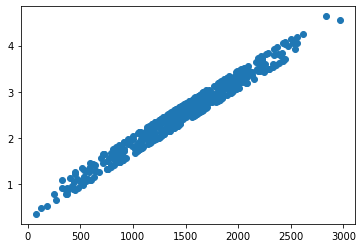

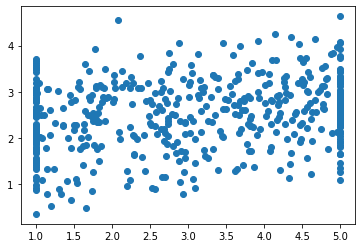

In [250]:
# Vaš kôd ovdje
l = 0.01
poly = PolynomialFeatures(1)
th = poly.fit_transform(grades_X_colinear)
ridge = Ridge(alpha=l)
ridge.fit(th,grades_y)
h = ridge.predict(th)
plt.figure(0)
plt.scatter(grades_X_colinear[:,0],h)
plt.figure(1)
plt.scatter(grades_X_colinear[:,1],h)
ridge.coef_

**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [260]:
from sklearn.model_selection import train_test_split
import statistics 
N = 10
lambdas = [0.01,1000]
weigths = np.empty((len(lambdas),N,3))
#print(weigths)
for i in range(0,N):
    X_train, X_test, y_train, y_test = train_test_split(grades_X_colinear,grades_y,test_size=0.5)

    for j,l  in enumerate(lambdas):
        poly = PolynomialFeatures(1)
        th = poly.fit_transform(X_train)
        ridge = Ridge(alpha=l)
        ridge.fit(th,y_train)
        #ridge.coef_[0] = ridge.intercept_
        w = ridge.coef_[1:]
        #print(j % len(lambdas),i * 2 // len(lambdas),w)
        weigths[j % len(lambdas)][i * 2 // len(lambdas)] = w
for x,y in zip(weigths,lambdas):
        print("lambda: " + str(y) + " w0 (mean,std) = ("+ str(statistics.mean(x[:,0])), "," + str(statistics.stdev(x[:,0]))+ ")")
        print("lambda: " + str(y) + " w1 (mean,std) = ("+ str(statistics.mean(x[:,1])), "," + str(statistics.stdev(x[:,1]))+ ")")
        print("lambda: " + str(y) + " w2 (mean,std) = ("+ str(statistics.mean(x[:,2])), "," + str(statistics.stdev(x[:,2]))+ ")")

        




lambda: 0.01 w0 (mean,std) = (0.0014164441766564909 ,2.8438979962026905e-05)
lambda: 0.01 w1 (mean,std) = (0.04634570404585772 ,0.00841161919028015)
lambda: 0.01 w2 (mean,std) = (0.04634570404604794 ,0.008411619190584606)
lambda: 1000 w0 (mean,std) = (0.001424831039122525 ,2.514419524326971e-05)
lambda: 1000 w1 (mean,std) = (0.0237396588485902 ,0.004114690301323774)
lambda: 1000 w2 (mean,std) = (0.023739658848590202 ,0.004114690301323774)


**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.